In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/ICR - Identifying Age-Related Conditions/train.csv")
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
def des_ana(dataframe):
    print('-----------------------Shape----------------------------')
    print(f'{dataframe.shape}\n\n')
    print('-----------------------Columns----------------------------')
    print(f'{dataframe.columns}\n\n')
    print('-----------------------Info----------------------------')
    print(f'{dataframe.info()}\n\n')
    print('-----------------------Descritive----------------------------')
    print(f'{dataframe.describe()}\n\n')
    print('-----------------------Null Values----------------------------')
    print(f'{dataframe.isnull().sum()}\n\n')
    print('-----------------------Unique Values----------------------------')
    print(f'{dataframe.nunique()}\n\n')

des_ana(df)

-----------------------Shape----------------------------
(617, 58)


-----------------------Columns----------------------------
Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')


-----------------------Info----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64


# Handling data

In [ ]:
#fill null values for columns have null values.

null_cols = [
    'BQ','CB','CC','DU','EL','FC','FL','FS','GL'
]

for null_col in null_cols:
    df[null_col] = df[null_col].fillna(df[null_col]).mean()

In [ ]:
df['EJ']

0      B
1      A
2      B
3      B
4      B
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 617, dtype: object

In [ ]:
# drop id column
df = df.drop('Id',axis=1)


In [ ]:
df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,5.433199,1.73855,0.421501,11.339138,72.611063,2003.810319,22.136229,69.834944,8.530961,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,5.433199,0.49706,0.421501,9.292698,72.611063,27981.562750,29.135430,32.131996,8.530961,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,5.433199,0.97556,0.421501,37.077772,88.609437,13676.957810,28.022851,35.192676,8.530961,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,5.433199,0.49706,0.421501,18.529584,82.416803,2094.262452,39.948656,90.493248,8.530961,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,5.433199,48.50134,0.421501,16.408728,146.109943,8524.370502,45.381316,36.262628,8.530961,1


In [ ]:
df['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x78086fb0db40>,
 [Text(-0.9378309675672217, 0.5748678772308721, '0'),
  Text(0.9378309137442025, -0.5748679650369418, '1')],
 [Text(-0.5115441641275754, 0.3135642966713847, '82.5%'),
  Text(0.511544134769565, -0.31356434456560456, '17.5%')])

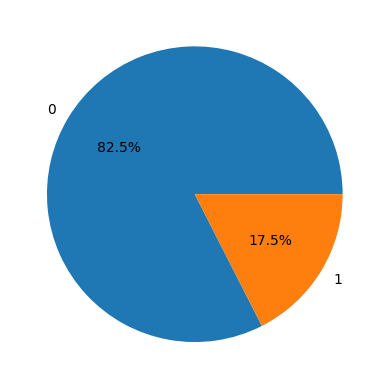

In [ ]:
fig, ax = plt.subplots()

sizes=df['Class'].value_counts()
labels='0','1'

ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [ ]:
le = LabelEncoder()
df['EJ']= le.fit_transform(df['EJ'])
df['Class'] = le.fit_transform(df['Class'])

In [ ]:
cat_cols = ['EJ', 'Class']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
def scale_and_OverSampler(df):
    X = df.iloc[:,:-1]
    y= df.iloc[:,-1].values

    # is_cat = X.dtypes == 'category'
    # cat_col_list = X.columns[is_cat].tolist()
    # X1 = X[cat_col_list]
    #   |
    #   V
    X1 = X[X.columns[X.dtypes == 'category'].tolist()]

    X.drop(X.columns[X.dtypes == 'category'],axis=1, inplace=True)
    X = pd.concat([X,X1], axis=1)
    X = X.values

    ct = ColumnTransformer(
        [('scale',StandardScaler(), slice(0,-1))],remainder='passthrough'
    )
    X[:,:-1] = ct.fit_transform(X[:,:-1])

    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)


    return X, y


X, y = scale_and_OverSampler(df)

In [ ]:
def scale_and_OverSampler(df, is_training_set=True):

    X = df.iloc[:,:-1]

    # is_cat = X.dtypes == 'category'
    # cat_col_list = X.columns[is_cat].tolist()
    # X1 = X[cat_col_list]
    #   |
    #   V
    X1 = X[X.columns[X.dtypes == 'category'].tolist()]

    X.drop(X.columns[X.dtypes == 'category'],axis=1, inplace=True)
    X = pd.concat([X,X1], axis=1)
    X = X.values

    # Choose columns to scale
    ct = ColumnTransformer(
        [('scale',StandardScaler(), slice(0,-1))],remainder='passthrough'
    )
    X[:,:-1] = ct.fit_transform(X[:,:-1])

    if is_training_set:
        y= df.iloc[:,-1].values

        # Random Over Sampler
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)
        return X, y

    return X

#X = scale_and_OverSampler(df_test, is_training_set=False)

In [ ]:
X, y = scale_and_OverSampler(df_test, is_training_set=True)

In [ ]:
sum(y == 1)

509

In [ ]:
sum(y == 0)

509

# Hypertuning data

In [ ]:
seed=42

model_params = {
    'Logistic Regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C':[1,5,10],
            'max_iter':[1,10,100,1000]
        }
    },
    'Decision Tree':{
        'model':DecisionTreeClassifier(random_state=seed),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[5,8,10]
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(random_state=seed),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[5,8,10]
        }
    },
    'XGBoots':{
        'model': XGBClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    },
    'LGB':{
        'model': LGBMClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    },
    'Ada Boost':{
        'model': AdaBoostClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000],
            'learning_rate':[0.005,0.01,0.1,0.2]

        }
    },
    'Gradient Boosting':{
        'model': GradientBoostingClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000],
            'learning_rate':[0.005,0.01,0.1,0.2]
        }
    },
    'svm': {
        'model': SVC(gamma='auto'),
        'params':{
            'C': [1,10,20],
            'kernel':['rbf','linear']
        }
    },
    'K Neighbors':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,3,5],
            'weights': ['uniform', 'distance']
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [ ]:
results_train = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
results_train

,model,best_score,best_params
0,Logistic Regression,0.889003,"{'C': 10, 'max_iter': 10}"
1,Decision Tree,0.947947,"{'criterion': 'entropy', 'max_depth': 10}"
2,Random Forest,0.984294,"{'criterion': 'gini', 'max_depth': 10}"
3,XGBoots,0.967579,{'n_estimators': 100}
4,LGB,0.982329,{'n_estimators': 100}
5,Ada Boost,0.957761,"{'learning_rate': 0.1, 'n_estimators': 1000}"
6,Gradient Boosting,0.977398,"{'learning_rate': 0.2, 'n_estimators': 1000}"
7,svm,0.963643,"{'C': 20, 'kernel': 'rbf'}"
8,K Neighbors,0.956785,"{'n_neighbors': 2, 'weights': 'uniform'}"


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.3, random_state=42)

# Training model

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       153
           1       0.96      1.00      0.98       153

    accuracy                           0.98       306
   macro avg       0.98      0.98      0.98       306
weighted avg       0.98      0.98      0.98       306



In [ ]:
lgb_model = LGBMClassifier(n_estimators=100, random_state=42)
lgb_model.fit(X_train,y_train)
y_pred = lgb_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       153
           1       0.97      1.00      0.99       153

    accuracy                           0.99       306
   macro avg       0.99      0.99      0.99       306
weighted avg       0.99      0.99      0.99       306



In [ ]:
rf_model = RandomForestClassifier(criterion= 'gini', max_depth= 3,max_features='log2', random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       153
           1       0.96      0.84      0.89       153

    accuracy                           0.90       306
   macro avg       0.90      0.90      0.90       306
weighted avg       0.90      0.90      0.90       306



In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Machine Learning/ICR - Identifying Age-Related Conditions/test.csv')
df_test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
des_ana(df_test)

In [ ]:
df_test.drop('Id', axis=1, inplace=True)

In [ ]:
df_test['EJ']= le.fit_transform(df_test['EJ'])

In [ ]:
X_test = scale_and_OverSampler(df_test, is_training_set=False)

In [ ]:
X_test

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0